In this notebook, we are visualizing the network of Y's and W's in LITE-1.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as md

In [3]:
my_pdb = "models/LITE1/multimer_LITE1_renumber.pdb"

In [4]:
traj = md.load(my_pdb)
top = traj.topology

In [5]:
TRP_atoms = top.select('resname TRP')
TRP_index = [top.atom(i).residue.index for i in TRP_atoms]
TRP_index_list = list(set(TRP_index))

In [6]:
TYR_atoms = top.select('resname TYR')
TYR_index = [top.atom(i).residue.index for i in TYR_atoms]
TYR_index_list = list(set(TYR_index))

In [7]:
TRP_TYR_index_list = TYR_index_list
TRP_TYR_index_list.extend(TRP_index_list)
TRP_TYR_index_list.sort()

In [8]:
length = len(TRP_TYR_index_list)
length

100

In [9]:
import itertools

In [10]:
pairs = list(itertools.product(TRP_TYR_index_list,TRP_TYR_index_list))

In [11]:
TYR_TRP_pair_distances = md.compute_contacts(traj[0],pairs,'closest')

In [12]:
distances_store = []
res_pair_idx_store = []
residue_store = []
res_close_res_count = []
for residue in range(length):
    distances = TYR_TRP_pair_distances[0].T[residue*length:residue*length+length]
    distances_store.append(distances)
    res_pair_idx = [idx for idx, val in enumerate(distances) if 0.0 < val < 1.4]
    res_pair_idx_store.append(res_pair_idx)
    these_pairs = [TYR_TRP_pair_distances[1][idx] for idx in res_pair_idx]
    residue_store.append([top.residue(pair[1]) for pair in these_pairs])
    res_close_res_count.append(len(res_pair_idx))

In [13]:
dict_source = []
dict_target = []
dict_distances = []

In [14]:
for i in range(0,int(length/4)):
    res = '%s'%top.residue(TYR_TRP_pair_distances[1][i*length][0])
    dict_source.append([res]*len(residue_store[i]))
    dict_target.append(['%s'%this for this in residue_store[i]])
    these_distances = distances_store[i][res_pair_idx_store[i]]
    dict_distances.append([j[0] for j in these_distances.tolist()])

In [15]:
flat_dict_source = [item for sublist in dict_source for item in sublist]

In [16]:
flat_dict_target = [item for sublist in dict_target for item in sublist]

In [17]:
flat_dict_distances = [item for sublist in dict_distances for item in sublist]

In [18]:
aromatic_dict = {'source': flat_dict_source , 'target': flat_dict_target, 'weight': flat_dict_distances }

In [19]:
aromatic_df = pd.DataFrame(data=aromatic_dict)

In [20]:
import networkx as nx

In [21]:
G = nx.from_pandas_edgelist(aromatic_df,source='source',target='target',edge_attr="weight")

In [22]:
G.nodes

NodeView(('TRP41', 'TYR49', 'TYR52', 'TYR53', 'TYR135', 'TYR288', 'TYR289', 'TYR75', 'TYR233', 'TYR216', 'TRP77', 'TYR295', 'TYR186', 'TRP191', 'TYR193', 'TYR196', 'TRP319', 'TRP328', 'TYR297', 'TYR396', 'TYR275', 'TYR361', 'TYR398', 'TYR414', 'TRP419'))

In [23]:
import pyvis
from pyvis.network import Network

In [24]:
net = Network(notebook=True)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [25]:
net.from_nx(G)

In [26]:
net.show('full_aromatic_network.html')

In [27]:
net.show_buttons()

In [28]:
#save network
nx.write_graphml_xml(G,'LITE1_network.xml')

In [29]:
bet_centrality = nx.betweenness_centrality(G)

In [30]:
bet_centrality

{'TRP41': 0.004933110367892976,
 'TYR49': 0.009310355506007681,
 'TYR52': 0.05325456548282637,
 'TYR53': 0.026455800640583248,
 'TYR135': 0.10591588363327495,
 'TYR288': 0.05389371095892835,
 'TYR289': 0.08045690219603263,
 'TYR75': 0.015242607633911978,
 'TYR233': 0.04045517686822034,
 'TYR216': 0.167773199023199,
 'TRP77': 0.0,
 'TYR295': 0.17024639008334658,
 'TYR186': 0.07570672081541652,
 'TRP191': 0.07570672081541652,
 'TYR193': 0.0012077294685990338,
 'TYR196': 0.0,
 'TRP319': 0.013043478260869561,
 'TRP328': 0.20593933039585216,
 'TYR297': 0.12086098281750454,
 'TYR396': 0.02597414662632054,
 'TYR275': 0.08333333333333333,
 'TYR361': 0.0,
 'TYR398': 0.15942028985507248,
 'TYR414': 0.08333333333333333,
 'TRP419': 0.0}

In [31]:
values = bet_centrality.values()

In [32]:
sort(list(values))

array([0.        , 0.        , 0.        , 0.        , 0.00120773,
       0.00493311, 0.00931036, 0.01304348, 0.01524261, 0.02597415,
       0.0264558 , 0.04045518, 0.05325457, 0.05389371, 0.07570672,
       0.07570672, 0.0804569 , 0.08333333, 0.08333333, 0.10591588,
       0.12086098, 0.15942029, 0.1677732 , 0.17024639, 0.20593933])

In [33]:
bet_centrality['TRP328']

0.20593933039585216

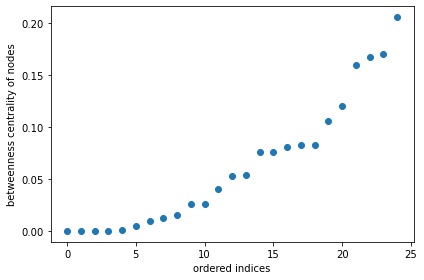

In [34]:
#plot centrality
plt.plot(sort(list(values)),'o')
plt.xlabel('ordered indices')
plt.ylabel('betweenness centrality of nodes')
plt.tight_layout()
plt.savefig('betweenness_centrality.png')

Make nicer plot.

In [35]:
import seaborn as sns
sns.set_context("notebook")

In [36]:
indices = np.arange(len(values))
indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

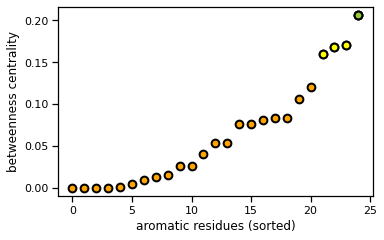

In [41]:
plt.figure(figsize=(5.5,3.5))
plt.scatter(indices,sort(list(values)),color='orange',s=60,edgecolors='k',linewidth=2)
plt.scatter(indices[-4:],sort(list(values))[-4:],color='yellow',s=60,edgecolors='k',linewidth=2)
plt.scatter(indices[-1],sort(list(values))[-1],color='yellowgreen',s=60,edgecolors='k',linewidth=2)
plt.xlabel('aromatic residues (sorted)')
plt.ylabel('betweenness centrality')
plt.tight_layout()
plt.savefig('betweenness_centrality_LITE1.svg')